In [1]:
import pandas as pd
import sys
import os

# Load your CSV data
df = pd.read_csv('../data/RFMScore.csv')


In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from woe_binning import *

In [3]:
#  1 = Good and anything else = Bad in RFMS_Label
df['Good_Bad'] = df['RFMS_Label'].apply(lambda x: 1 if x == 1 else 0)


In [4]:
# Bin the relevant features (Recency, Frequency, and Monetary) using quantile binning
df['Recency_bin'] = pd.qcut(df['Recency'], q=10, duplicates='drop')  # Quantile binning Recency into 10 bins
df['Frequency_bin'] = pd.qcut(df['Frequency'], q=10, duplicates='drop')  # Quantile binning Frequency into 10 bins
df['Monetary_bin'] = pd.qcut(df['Monetary'], q=10, duplicates='drop')  # Quantile binning Monetary into 10 bins



In [5]:
# Calculate WoE for each feature
woe_recency = calc_woe(df, 'Recency_bin', 'Good_Bad')
woe_frequency = calc_woe(df, 'Frequency_bin', 'Good_Bad')
woe_monetary = calc_woe(df, 'Monetary_bin', 'Good_Bad')



In [6]:
# Printing WoE results for each feature
print("WoE for Recency bins:")
print(woe_recency)

WoE for Recency bins:
                    WoE
Recency_bin            
(-0.001, 7.0] -0.985680
(7.0, 15.0]   -1.103497
(15.0, 22.0]  -0.996798
(22.0, 32.0]  -0.918624
(32.0, 43.0]  -0.606829
(43.0, 51.0]        inf
(51.0, 59.0]        inf
(59.0, 68.0]        inf
(68.0, 77.0]        inf
(77.0, 90.0]        inf


c:\bati-bank-credit-scoring\scripts\woe_binning.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=woe_df.index, y=woe_df['WoE'], palette='viridis')


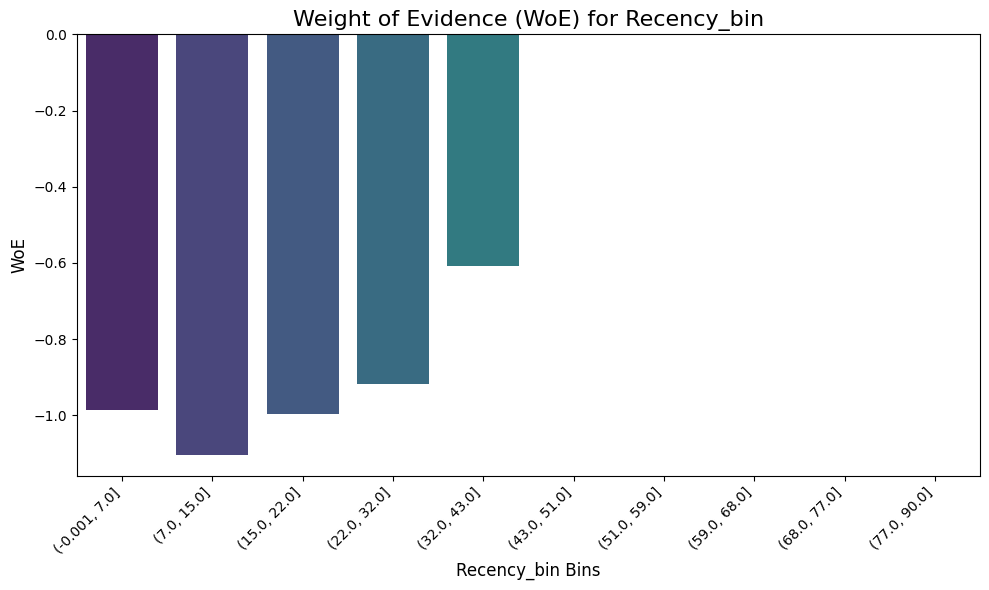

In [7]:
# Visualize WoE for Recency
plot_woe(woe_recency, 'Recency_bin')

c:\bati-bank-credit-scoring\scripts\woe_binning.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=woe_df.index, y=woe_df['WoE'], palette='viridis')


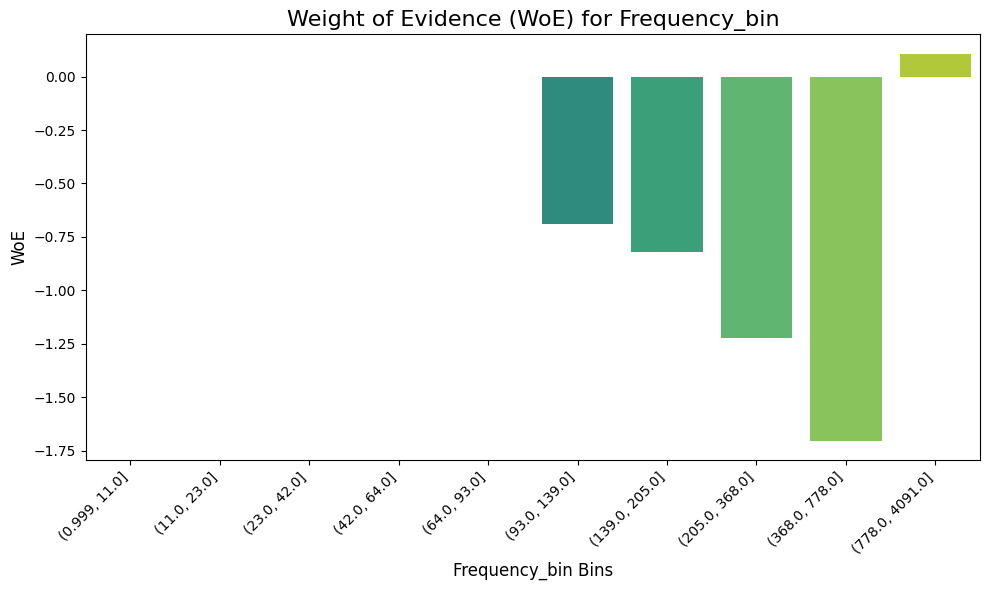

In [8]:
# Visualize WoE for Frequency
plot_woe(woe_frequency, 'Frequency_bin')

c:\bati-bank-credit-scoring\scripts\woe_binning.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=woe_df.index, y=woe_df['WoE'], palette='viridis')


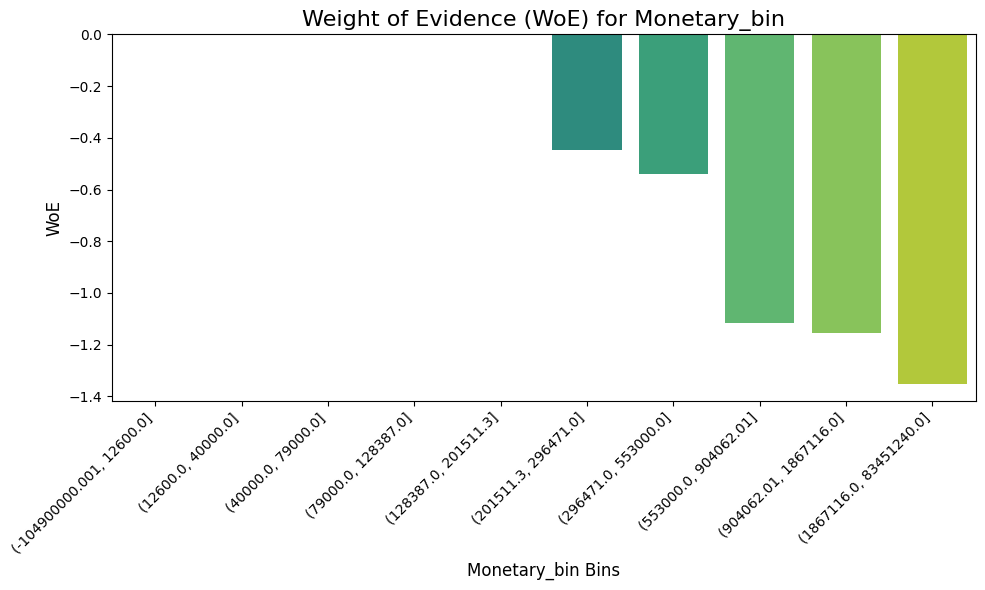

In [9]:
# Visualize WoE for Monetary
plot_woe(woe_monetary, 'Monetary_bin')

In [10]:
df.to_csv('../data/woe_binning.csv', index=False)